# Part 2
## 1. Knn Classifier

Imports

In [2]:
import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

Important functions

In [3]:
"""
    Calculates the eyclidean distance between to vectors
"""
def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

"""
    Implements the knn algorithm
"""
def knn(data, query, k): 
    neighbor_distances = []
    for index, row in enumerate(data):
        distance = euclidean_distance(row, query)
        neighbor_distances.append((distance, index))
    
    sorted_neighbor_distances = sorted(neighbor_distances)
    k_nearest_distances_and_indices = sorted_neighbor_distances[:k]

    #return only the indeces
    return [i[1] for i in k_nearest_distances_and_indices] 

"""
    Takes a list with objects and returns the one that appears
    the most inside the list.
"""
def most_frequent(label_list): 
    counter = 0
    most_common = label_list[0] 
    for label in label_list: 
        curr_frequency = label_list.count(label) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            most_common = label 
    return most_common 

Load the dataset

In [4]:
file_path = "../UCIdata-exercise1/pima-indians-diabetes.data"
# file_path = "../UCIdata-exercise1/iris.data"

df = pd.read_csv(file_path, header=None).sample(frac=1)



Get a **K**, and run with the **KNN classification** on our dataset using 10-fold **_cross valistation_**

In [5]:
ks = []
means = []
for k in range(1,40):

    sum = 0

    for index in range(10):
        # Make the train/test set
        test = df[int(index*len(df)*0.1):int(index*len(df)*0.1)+int(len(df)*0.1)]
        train = df[0:int(index*len(df)*0.1)]
        train = train.append(df[int(index*len(df)*0.1)+int(len(df)*0.1):])


        train_x = train.iloc[:,:-1].values
        train_y = train.iloc[:,-1].values

        test_x = test.iloc[:,:-1].values
        test_y = test.iloc[:,-1].values


        ## ------ KNN ------ ## 
        total_correct = 0
        t_y = list(train_y)
        for i in range(len(test_x)):
            results=knn(train_x, test_x[i], k)
            label_results = []
            for j in sorted(results):
                label_results.append(t_y[j])
            # print(list(label_results))
            final_label = most_frequent(list(label_results))

            if(final_label == test_y[i]):
                total_correct +=1

        accuracy = total_correct/len(test_x)
        sum += accuracy
        # print(index, ") Accuracy: ", round(accuracy, 4))


    means.append(sum/10)
    ks.append(k)
    print("K:", k, "Mean : ", round(sum/10, 4))

K: 1 Mean :  0.6724
K: 2 Mean :  0.6684
K: 3 Mean :  0.6921
K: 4 Mean :  0.6961
K: 5 Mean :  0.7158
K: 6 Mean :  0.7079
K: 7 Mean :  0.7263
K: 8 Mean :  0.7289
K: 9 Mean :  0.7368
K: 10 Mean :  0.7289
K: 11 Mean :  0.7329
K: 12 Mean :  0.7368
K: 13 Mean :  0.7513
K: 14 Mean :  0.7395
K: 15 Mean :  0.7526
K: 16 Mean :  0.7461
K: 17 Mean :  0.7579
K: 18 Mean :  0.7592
K: 19 Mean :  0.7566
K: 20 Mean :  0.7395
K: 21 Mean :  0.7447
K: 22 Mean :  0.7382
K: 23 Mean :  0.7395
K: 24 Mean :  0.7329
K: 25 Mean :  0.7434
K: 26 Mean :  0.7487
K: 27 Mean :  0.7474
K: 28 Mean :  0.7342
K: 29 Mean :  0.7368
K: 30 Mean :  0.7289
K: 31 Mean :  0.7303
K: 32 Mean :  0.7237
K: 33 Mean :  0.7329
K: 34 Mean :  0.7303
K: 35 Mean :  0.7408
K: 36 Mean :  0.7263
K: 37 Mean :  0.7316
K: 38 Mean :  0.7263
K: 39 Mean :  0.7342


Text(0.5, 0, 'K')

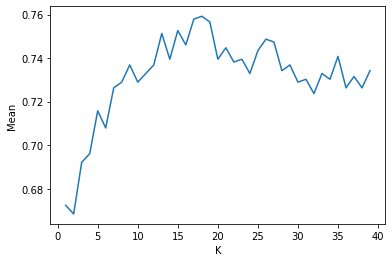

In [6]:
plt.plot(ks, means)
plt.ylabel('Mean')
plt.xlabel('K')

In [8]:
print("Max mean: ", max(means), " for k:", ks[means.index(max(means))])

Max mean:  0.7592105263157896  for k: 18


---